In [8]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

#Evalaluation
from sklearn.cross_validation import cross_val_score

D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
# Load
train_df = pd.read_csv('clean_train.csv')
test_df = pd.read_csv('clean_test.csv')

In [10]:
X = train_df.drop(["Survived"] , axis=1)
y = train_df["Survived"]
oosample  = test_df.drop("PassengerId", axis=1).copy()
X.shape, y.shape, oosample.shape

((891, 8), (891,), (418, 8))

In [11]:
from sklearn.model_selection import train_test_split
# use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((668, 8), (668,), (223, 8), (223,))

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass       891 non-null int64
Sex          891 non-null int64
Age          891 non-null int64
Fare         891 non-null int64
Embarked     891 non-null int64
Title        891 non-null float64
IsAlone      891 non-null int64
Age*Class    891 non-null int64
dtypes: float64(1), int64(7)
memory usage: 55.8 KB


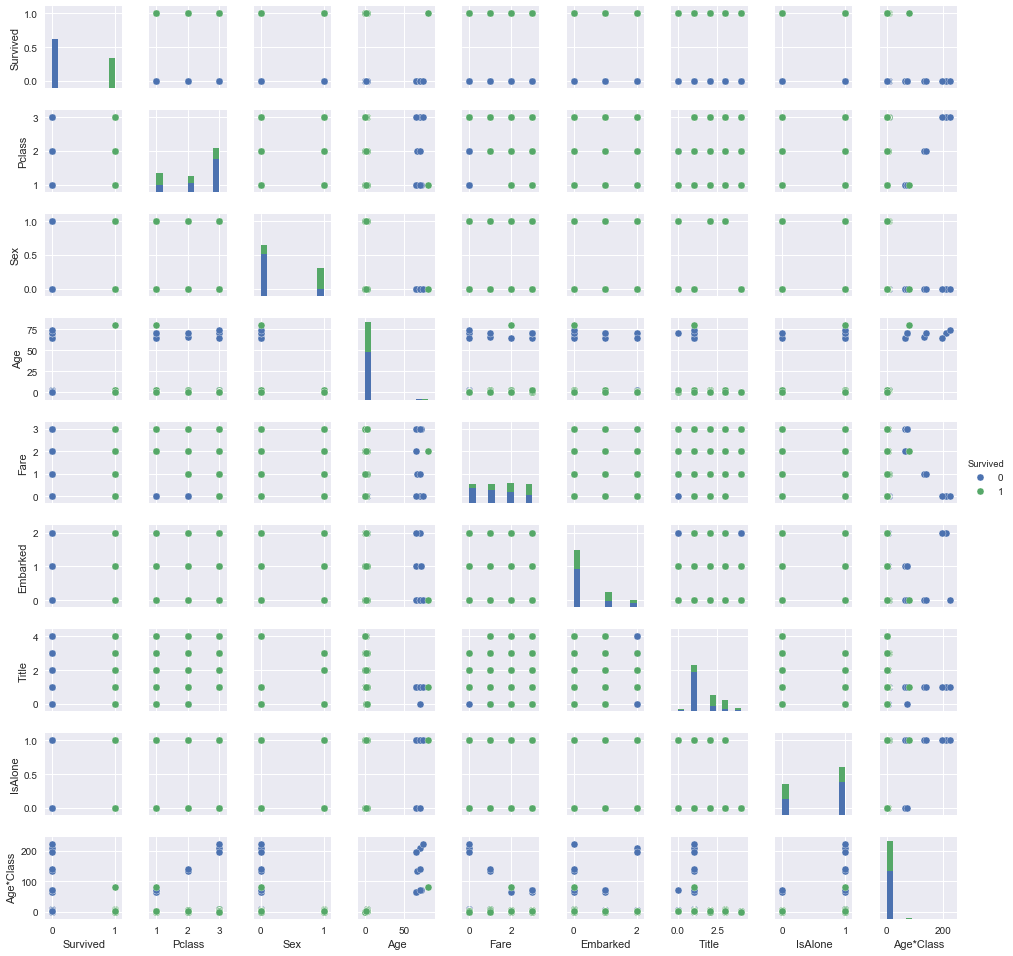

In [19]:
import seaborn as sns; sns.set()
sns.pairplot(train_df, hue='Survived', size=1.5);

## MODELS

In [22]:
### Random Forest
random_forest = RandomForestClassifier(n_estimators=500)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(acc_random_forest)
print(cross_val_score(random_forest, X, y, cv=10, scoring='accuracy').mean()*100)

86.98
80.8186074225


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

print(cross_val_score(bag, X, y, cv=10, scoring='accuracy').mean()*100)

0.803691408467


In [14]:
knn = KNeighborsClassifier(n_neighbors=2)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()*100)

0.768971456134


In [15]:
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
df = pd.DataFrame(k_scores, index=k_range, columns=["Scores"])
df['Scores'].argmax()

15

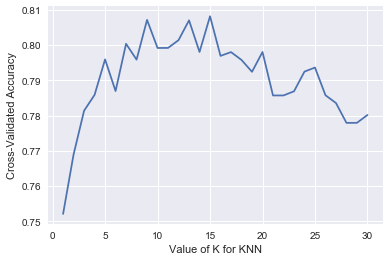

In [16]:
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')


In [17]:
# Logistic
from sklearn.linear_model import LogisticRegression

model= LogisticRegression()

#Fit Model
scores= cross_val_score(model, X, y, cv=10, scoring='accuracy')
scores.mean()*100

0.80475229826353423

In [18]:
# Linear SVM
from sklearn import svm

# Define Model
model = svm.LinearSVC()
#Fit Model
scores= cross_val_score(model, X, y, cv=10, scoring='accuracy')
scores.mean()*100

0.80360345023266366

In [ ]:
def submit(model):
    model.fit(X, y)
    submission = model.predict(oosample)

    df = pd.DataFrame({'PassengerId':test_df.PassengerId, 
                       'Survived':submission})

    print(len(df))
    print(df.head())


# In[81]:

submit(model)


# In[79]:

df.to_csv('titanic1.csv',header=True,index=False)